![example]()

# Predicting-Most-Valuable-Home-Projects-In-King-County-Analysis

# Introduction

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below. The aim of this project is to develop a linear regression model than can predict a house's price as accurately as possible.

# Business Problem

A client in King County, WA wants to advise homeowners on home improvement projects that will add to the sale value of their homes.

# Analysis Questions

This analysis will seek to answer three questions about the data:

Question 1: Will enclosing a porch increase the sale price of a home?

Question 2: Is converting a garage to a bedroom a good way to increase the sale price of a home?

Questin 3: Will upgrading to a forced-air heating system increase the sale price of a home?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('../../data/raw/EXTR_RPSale.csv')
df.head()

In [ ]:
zerocontent = df['AFCurrentUseLand'].str.contains('N')
zerocontent

In [ ]:
forestland = zerocontent.loc[zerocontent != False]
len(forestland)

In [ ]:
len(zerocontent) - len(forestland)

In [ ]:
details = df.apply(lambda x: True if "N" in df['AFForestLand'] else False , axis=1)
details

In [ ]:
to_drop = ['AFForestLand','AFCurrentUseLand','AFNonProfitUse', 'AFHistoricProperty']
df = df.drop(to_drop, axis=1)

In [ ]:
df.head()

In [ ]:
values=[9800, 10050]
filtered_df = df[df.Major.isin(values)]
filtered_df

In [ ]:
df.tail(2)

In [ ]:
to_drop = ['Volume','Page','PlatNbr', 'PlatType', 'PlatLot', 'PlatBlock']
df = df.drop(to_drop, axis=1)

In [59]:
housing_data = pd.read_csv('../../data/raw/EXTR_ResBldg.csv')
housing_data.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0
2,9830,20,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,0,2017,0,0,0,0,3,0
3,9830,160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,0,2013,0,0,0,0,3,0
4,10050,180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0


In [ ]:
values=[9800, 10050]
filtered_df = housing_data[housing_data.Major.isin(values)]
filtered_df.head()

In [ ]:
values=[9800, 10050]
filtered_df = parcel[parcel.Major.isin(values)]
filtered_df

In [ ]:
parcel = pd.read_csv('../../data/raw/EXTR_Parcel.csv')
parcel.tail()

In [ ]:
parcel.info()

In [ ]:
df4 = pd.read_csv('../../data/raw/EXTR_LookUp.csv')
df4.head()

In [ ]:
df4['LUDescription'].value_counts()

In [ ]:
(df4.iloc[[3]])

In [ ]:
display(df4.loc[2])

In [ ]:
with pd.option_context('display.max_colwidth', None):
  display(df4.head(10))

In [ ]:
multiple = df4['LUDescription'].str.contains('Multiple')
multiple

In [ ]:
multiple = display(df4[multiple])
multiple.head(2)

In [ ]:
with pd.option_context('display.max_colwidth', None):
  display(df4['LUDescription'].str.contains 'Multiple')

In [ ]:
housing_data.head()

In [ ]:
housing_data.info()

This is a large dataset, containing more than 181 thousand entries and 49 columns. Almost all of the columns contain numeric data, which is convenient for linear regression.
A look at the distribution of variables in the dataset:

In [ ]:
housing_data.hist(figsize=(20,20));

A lot of the variables don't follow a normal distribution which may create issues with satisfying all regression assumptions, Regression does not require features to be normally distributed so I'll address those issues as they arise. 

# Preprocessing

I'll take a look at missing values in each of the columns:

In [ ]:
for column in housing_data.columns:
    num_of_null = (sum(housing_data[column].isnull())/len(housing_data[column])) * 100 #<- to figure out the proportion
    print(column, num_of_null)

'DirectionPrefix', 'DirectionSuffix', and 'ZipCode' all contain null values. Upon further inspection of the dataframe, a number of columns contain empty values (indicated by '0') whilst others contain no values at all, all of which I will inspect further to see which should be dropped and which should be filled with a median:

In [ ]:
housing_data['DirectionPrefix'].value_counts()

In [ ]:
housing_data['DirectionSuffix'].value_counts()

In [ ]:
housing_data['ZipCode'].value_counts()

In [ ]:
housing_data['Fraction'].value_counts()

In [ ]:
housing_data['FpMultiStory'].value_counts()

In [ ]:
housing_data['FpFreestanding'].value_counts()

In [ ]:
housing_data['FpAdditional'].value_counts()

In [ ]:
housing_data['YrRenovated'].value_counts()

In [ ]:
housing_data['PcntComplete'].value_counts()

In [ ]:
housing_data['Obsolescence'].value_counts()

In [ ]:
housing_data['PcntNetCondition'].value_counts()

In [ ]:
housing_data['AddnlCost'].value_counts()

After careful consideration, I've decided to remove the above columns as many of them contain null or empty values and removing them will not adversely affect the data outcomes.

In [ ]:
housing_data.head()

In [ ]:
housing_data.drop(['DirectionPrefix', 'DirectionSuffix', 'ZipCode', 'Fraction'], axis= 1, inplace=True)

In [ ]:
housing_data.drop(['FpFreestanding', 'FpAdditional', 'YrRenovated', 'PcntComplete'], axis= 1, inplace=True)

In [ ]:
housing_data.drop(['PcntNetCondition', 'AddnlCost', 'FpMultiStory', 'Obsolescence'], axis= 1, inplace=True)

In [ ]:
housing_data.drop(['ViewUtilization', 'BrickStone', 'FpSingleStory'], axis= 1, inplace=True)

In [ ]:
housing_data.drop(['BrickStone', 'FpSingleStory', 'StreetName', 'StreetType'], axis= 1, inplace=True)

In [ ]:
housing_data.drop(['DirectionPrefix', 'DirectionSuffix', 'ZipCode', 'Fraction', 'FpFreestanding', 'FpAdditional',
                  'YrRenovated', 'PcntComplete', 'PcntNetCondition', 'AddnlCost','FpMultiStory', 'Obsolescence',
                  'ViewUtilization', 'BrickStone', 'FpSingleStory','BrickStone', 'FpSingleStory',
                   'StreetName', 'StreetType' ], axis= 1, inplace=True)

In [ ]:
housing_data.head()

In [ ]:
housing_data['ViewUtilization'].value_counts()

In [ ]:
housing_data['BrickStone'].value_counts()

In addition, I will remove the 'StreetName' and 'StreetType' columns since this information is already listed in the address column.

In [ ]:
housing_data.drop(['StreetName', 'StreetType'], axis= 1, inplace=True)

In [ ]:
housing_data.info()

In [ ]:
new_df = pd.merge(housing_data, df,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
new_df.head()

In [92]:
homes = pd.read_csv('../../data/raw/EXTR_ResBldg.csv')
homes.head(2)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0


In [69]:
homes = homes.dropna(how='any',axis=0)
homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154594 entries, 0 to 181506
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Major               154594 non-null  int64  
 1   Minor               154594 non-null  int64  
 2   BldgNbr             154594 non-null  int64  
 3   NbrLivingUnits      154594 non-null  int64  
 4   Address             154594 non-null  object 
 5   BuildingNumber      154594 non-null  object 
 6   Fraction            154594 non-null  object 
 7   DirectionPrefix     154594 non-null  object 
 8   StreetName          154594 non-null  object 
 9   StreetType          154594 non-null  object 
 10  DirectionSuffix     154594 non-null  object 
 11  ZipCode             154594 non-null  object 
 12  Stories             154594 non-null  float64
 13  BldgGrade           154594 non-null  int64  
 14  BldgGradeVar        154594 non-null  int64  
 15  SqFt1stFloor        154594 non-nul

In [93]:
sales = pd.read_csv('../../data/raw/EXTR_RPSale.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351067 entries, 0 to 351066
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ExciseTaxNbr        351067 non-null  int64 
 1   Major               351067 non-null  int64 
 2   Minor               351067 non-null  int64 
 3   DocumentDate        351067 non-null  object
 4   SalePrice           351067 non-null  int64 
 5   RecordingNbr        351067 non-null  object
 6   Volume              351067 non-null  object
 7   Page                351067 non-null  object
 8   PlatNbr             351067 non-null  object
 9   PlatType            351067 non-null  object
 10  PlatLot             351067 non-null  object
 11  PlatBlock           351067 non-null  object
 12  SellerName          351067 non-null  object
 13  BuyerName           351067 non-null  object
 14  PropertyType        351067 non-null  int64 
 15  PrincipalUse        351067 non-null  int64 
 16  Sa

In [94]:
sales = sales[['Major', 'Minor', 'SalePrice', 'DocumentDate','PrincipalUse']]
sales.head()

,Major,Minor,SalePrice,DocumentDate,PrincipalUse
0,198920,1430,0,03/28/2017,7
1,638580,110,190000,07/14/2015,6
2,919715,200,192000,07/08/2019,2
3,894677,240,818161,12/21/2016,6
4,445872,260,0,10/03/2016,2


In [77]:
sales = sales.dropna(how='any',axis=0)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351067 entries, 0 to 351066
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Major         351067 non-null  int64 
 1   Minor         351067 non-null  int64 
 2   SalePrice     351067 non-null  int64 
 3   DocumentDate  351067 non-null  object
 4   PrincipalUse  351067 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 16.1+ MB


In [95]:
parcells = pd.read_csv('../../data/raw/EXTR_Parcel.csv')
parcells.head(2)

,Unnamed: 0,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,807841,410,,SUMMER RIDGE DIV NO. 02,41,,6,25,22,...,N,N,N,N,N,N,N,N,N,N
1,2,755080,15,,SANDER'S TO GILMAN PK & SALMON BAY,3,1,3,25,11,...,N,N,N,N,N,N,N,N,N,N


In [89]:
parcells = parcells.dropna(how='any',axis=0)
parcells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 39 to 205176
Data columns (total 82 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3771 non-null   int64  
 1   Major                   3771 non-null   int64  
 2   Minor                   3771 non-null   int64  
 3   PropName                3771 non-null   object 
 4   PlatName                3771 non-null   object 
 5   PlatLot                 3771 non-null   object 
 6   PlatBlock               3771 non-null   object 
 7   Range                   3771 non-null   int64  
 8   Township                3771 non-null   int64  
 9   Section                 3771 non-null   int64  
 10  QuarterSection          3771 non-null   object 
 11  PropType                3771 non-null   object 
 12  Area                    3771 non-null   float64
 13  SubArea                 3771 non-null   float64
 14  SpecArea                3771 non-null

In [97]:
newhomes = pd.merge(newhomes, parcells,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
newhomes.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,N,N,N,N,N,N,N,N,N,N
1,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,N,N,N,N,N,N,N,N,N,N
2,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,N,N,N,N,N,N,N,N,N,N
3,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,N,N,N,N,N,N,N,N,N,N
4,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,N,N,N,N,N,N,N,N,N,N


In [81]:
newhomes = newhomes.dropna(how='any',axis=0)
newhomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 133 entries, Major to PrincipalUse
dtypes: float64(45), int64(41), object(47)
memory usage: 0.0+ bytes


In [98]:
newhomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251300 entries, 0 to 251299
Columns: 133 entries, Major to OtherProblems
dtypes: bool(1), float64(5), int64(81), object(46)
memory usage: 255.2+ MB


In [102]:
features = ['Bedrooms', 'SqFtTotLiving','SqFt1stFloor','SqFtLot', 'Stories', 'BldgGrade','YrBuilt', 'SalePrice']

In [104]:
abs(newhomes.corr()) > 0.70

,Major,Minor,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,NbrBldgSites,Contamination,HistoricSite,CurrentUseDesignation
Major,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Minor,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BldgNbr,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
NbrLivingUnits,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Stories,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AirportNoise,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
NbrBldgSites,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Contamination,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
HistoricSite,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [111]:
abs(newhomes.corr('kendall')) > 0.70

,Major,Minor,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,NbrBldgSites,Contamination,HistoricSite,CurrentUseDesignation
Major,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Minor,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BldgNbr,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
NbrLivingUnits,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Stories,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AirportNoise,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
NbrBldgSites,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Contamination,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
HistoricSite,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

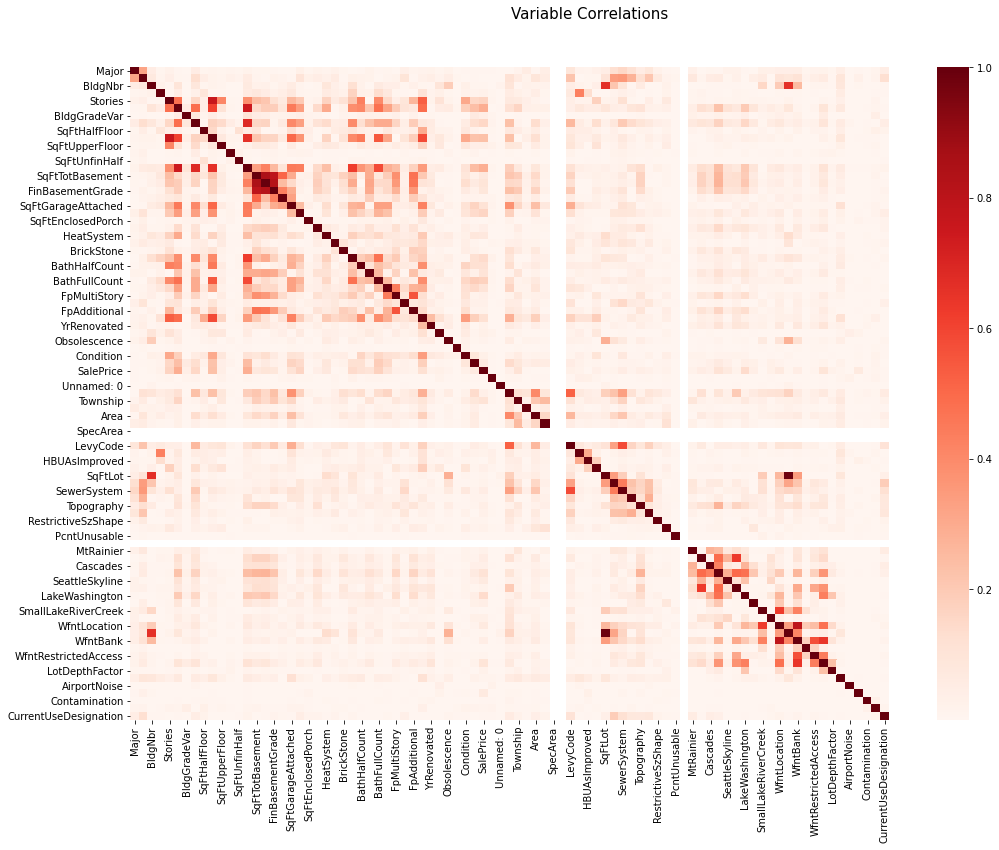

In [106]:
corr = newhomes.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=15, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=False)
heatmap

In [71]:
newhomes = pd.merge(homes, pricing,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
newhomes.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,9800,720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9802,140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9830,160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10050,180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10050,350,1,1,2423 S 354TH ST 98003,2423,,S,354TH,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
newhomes.isnull()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154589,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
154590,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
154591,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
154592,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [67]:
newhomes = newhomes.dropna(how='any',axis=0)
newhomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 130 entries, Major to OtherProblems
dtypes: bool(1), float64(5), int64(79), object(45)
memory usage: 0.0+ bytes


In [ ]:
new_df.info()

In [ ]:
new_df['NbrLivingUnits'].value_counts()

For the sake of this analysis, which is to determine which home improvement projects provide the most value to a home, I will only keep the data pertaining to single living units only, and remove those that have 2 or more.

In [ ]:
new_df.drop(['SellerName', 'BuyerName'], axis=1, inplace=True)

In [ ]:
new_df.drop(['BldgNbr'], axis=1, inplace=True)

In [ ]:
new_df.drop(['BldgGradeVar'], axis =1, inplace=True)

In [ ]:
new_df.head()

# Outliers

Outliers should be kept if they have the potential to reveal useful information about relationships in our data. There is a variable in this dataset, however, whose outliers I will remove: multiple living units. If a residence in the dataset has more than 1  living unit, we're likely not dealing with single-family homes, but much larger units that would be better to analyze separately. For this reason, we'll remove all rows in the data that contain values greater than 1 for this column.

In [ ]:
prices = single_family_homes[single_family_homes['SalePrice'] > 0]
prices.head()

In [ ]:
len(prices)

I will replace the approximate 75 thousand missing price values with the median to avoid losing important data

In [ ]:
pricing_mean = (np.mean(new_df['SalePrice']))

In [ ]:
new_df['SalePrice']=new_df['SalePrice'].replace(0,df['SalePrice'].mean())

In [ ]:
new_df.SalePrice.apply('pricing_mean')

In [ ]:
new_df.head()

In [ ]:
new_df['SalePrice']= new_df['SalePrice'].astype(np.int64)

In [ ]:
new_df.head()

In [ ]:
single_family_homes = new_df[new_df['NbrLivingUnits'] == 1]
single_family_homes

In [ ]:
single_family_homes['SqFtHalfFloor'].value_counts()

In [ ]:
new_df.drop(['SqFtHalfFloor'], axis=1, inplace=True)

In [ ]:
new_df['SqFtEnclosedPorch'].value_counts()

The main variable in the dataset that I would be focused on in relation to price is 'SqFtEnclosedPorch', which doesn't have a clear linear relationship. The values for this column are in feet. Interestingly, the below scatterplot shows that 'average' houses tend to perform the best overall in terms of price.

In [ ]:
single_family_homes.info()

In [ ]:
single_family_homes = pd.DataFrame(single_family_homes)
single_family_homes

In [ ]:
single_family_homes['SqFtEnclosedPorch'].value_counts()

In [ ]:
single_family_homes['SalePrice'].value_counts()

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(single_family_homes['SqFtEnclosedPorch'], single_family_homes['SalePrice'])
plt.title('Sq Ft W/Enclosed Porch and Price', fontsize=15)

This may be due to the fact that the condition values are relative to age and grade (i.e. the design/quality of construction rather than the utility/functionality of the building). A new, excellently designed, expensive home could be given an 'average' condition rating if some functional repairs are needed. As we can see in the scatterplot below, average condition houses also tend to do well with grade rating.

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(single_family_homes['Condition'], single_family_homes['BldgGrade'])
plt.title('House Condition and Grade', fontsize=15)

A clearer linear relationship between price and specific condition values may be possible, which I will explore more effectively by one-hot encoding the variable. The below code creates a dummy variable for each condition value, drops the first value to avoid the dummy variable trap, drops the original column, and joins the new variables to the dataframe.

In [ ]:
one_hot = pd.get_dummies(single_family_homes['Condition'], drop_first=True) #drop a column to avoid dummy variable trap
single_family_homes = single_family_homes.drop('Condition',axis = 1)
single_family_homes = single_family_homes.join(one_hot)

Now if I generate scatter plots the condition values, we should see a clearer linear relationship.

In [ ]:
price = single_family_homes['SalePrice']
two = single_family_homes['two'] = single_family_homes[2] 
three = single_family_homes['three'] = single_family_homes[3] 
four = single_family_homes['four'] = single_family_homes[4] 
five = single_family_homes['five'] = single_family_homes[5] 

f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

f.suptitle('House Condition and Price', fontsize=18, y=1.1)
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

sc = axes[0][0].scatter(two, price, c = price, marker = "*")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(three, price, c = price, marker = "*")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(four, price, c = price, marker = "*")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(five, price, c = price, marker = "*")
axes[1][1].set_xlabel('Condition 5')


f.tight_layout()
plt.show()

# Correlations and Multicollinearity

To see which variables should be included in my model, I should investigate which variables are most strongly correlated with price
We're interested in finding out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model. One of the assumptions of a multiple linear regression model, however, is that there is no multicollinearity among the explanatory variables (i.e., they can't be predicted by other explanatory variables with high accuracy). Below, we create a correlation matrix of price and continuous variables in the dataset to visualize correlations.

In [ ]:
housing_sales = pd.merge(saleprices, housing_data,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
housing_sales.head()

In [ ]:
housing_info.info()

In [ ]:
housing_info.rename(columns = {'OtherView':'View'}, inplace = True)
housing_info.info()

In [ ]:
#create a list of meaningfully continuous x variables
x_columns = ['Bedrooms', 'BathHalfCount', 'BathFullCount', 'SqFtTotLiving',
       'SqFtLot', 'Stories', 'BldgGrade','View', 'YrBuilt', 2, 3, 4, 5]

#update dataframe to only include the above variables
df_clean = housing_info[x_columns]
df_clean['Price'] = housing_info['SalePrice']
housing_info = df_clean

In [58]:
saleprices = pd.read_csv('../../data/raw/EXTR_RPSale.csv')
saleprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351067 entries, 0 to 351066
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ExciseTaxNbr        351067 non-null  int64 
 1   Major               351067 non-null  int64 
 2   Minor               351067 non-null  int64 
 3   DocumentDate        351067 non-null  object
 4   SalePrice           351067 non-null  int64 
 5   RecordingNbr        351067 non-null  object
 6   Volume              351067 non-null  object
 7   Page                351067 non-null  object
 8   PlatNbr             351067 non-null  object
 9   PlatType            351067 non-null  object
 10  PlatLot             351067 non-null  object
 11  PlatBlock           351067 non-null  object
 12  SellerName          351067 non-null  object
 13  BuyerName           351067 non-null  object
 14  PropertyType        351067 non-null  int64 
 15  PrincipalUse        351067 non-null  int64 
 16  Sa

In [ ]:
housing_data = pd.read_csv('../../data/raw/EXTR_ResBldg.csv')
housing_data.info()

In [ ]:
housing_data['ViewUtilization'].value_counts()

In [ ]:
housing_data['SqFtTotLiving'].value_counts()

In [ ]:
housing_sales = pd.read_csv('../../data/processed/housing_sales.csv')
housing_sales.info()

In [ ]:
housing_info = housing_info.to_csv('housing_info.csv', index = True) 
print('\nCSV String:\n', housing_info) 

In [ ]:
housing_info = pd.read_csd('../../data/processed/housing_info.csv')
housing

In [ ]:
housing_info.head()

In [ ]:
housing_info = pd.read_csv('../../data/processed/housing_info.csv')
housing_info.head()

In [ ]:
housing_info.reset_index(drop=True, inplace=True)

In [ ]:
housing_info.info()

In [ ]:
to_drop3 = ['Unnamed: 0']
housing_info.drop(to_drop3, axis=1, inplace=True)
housing_info.head()

In [ ]:
to_drop2 = ['SaleInstrument', 'SaleReason', 'PropertyClass', 'SaleWarning']
housing_info.drop(to_drop2, axis=1, inplace=True)
housing_info.head()

In [ ]:
housing_info = pd.merge(housing_sales, parcel_info,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
housing_info.head()

In [ ]:
housing_info.info()

In [ ]:
to_drop = ['Volume','Page','PlatNbr', 'PlatType', 'PlatLot', 'PlatBlock', 'AFForestLand','AFCurrentUseLand',
          'AFNonProfitUse', 'AFHistoricProperty', 'SellerName', 'BuyerName']
parcel.drop(to_drop, axis=1, inplace=True)

In [ ]:
parcel_info = parcel[['Major', 'Minor', 'SqFtLot', 'OtherView', 'TrafficNoise','OtherNuisances']]
parcel_info.head()

In [ ]:
parcel['OtherView'].value_counts()

In [ ]:
parcel = pd.read_csv('../../data/raw/EXTR_Parcel.csv')
parcel.info()

In [ ]:
to_drop = ['Volume','Page','PlatNbr', 'PlatType', 'PlatLot', 'PlatBlock', 'AFForestLand','AFCurrentUseLand',
          'AFNonProfitUse', 'AFHistoricProperty', 'SellerName', 'BuyerName']
saleprices.drop(to_drop, axis=1, inplace=True)

In [ ]:
housing_data.drop(['DirectionPrefix', 'DirectionSuffix', 'ZipCode', 'Fraction', 'FpFreestanding', 'FpAdditional',
                  'YrRenovated', 'PcntComplete', 'PcntNetCondition', 'AddnlCost','FpMultiStory', 'Obsolescence',
                  'ViewUtilization', 'BrickStone', 'FpSingleStory','BrickStone', 'FpSingleStory',
                   'StreetName', 'StreetType', 'BldgGradeVar', 'SqFtHalfFloor'], axis= 1, inplace=True)

In [ ]:
saleprices.head()

In [ ]:
saleprices['SalePrice']=saleprices['SalePrice'].replace(0,saleprices['SalePrice'].mean())

In [ ]:
saleprices.head()

In [ ]:
saleprices['SalePrice']=saleprices['SalePrice'].astype(np.int64)
saleprices.head()

In [ ]:
housing_sales = pd.merge(saleprices, housing_data,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
housing_sales.head()

In [ ]:
housing_sales = housing_sales.dropna(how='any',axis=0)
housing_sales.head()

In [ ]:
len(housing_sales)

In [ ]:
housing_sales.info()

In [ ]:
housing_sales = housing_sales[housing_sales['NbrLivingUnits'] == 1]
housing_sales.head()

In [ ]:
housing_sales['NbrLivingUnits'].value_counts()

In [ ]:
housing_info.drop('Unnamed: 0', axis=1, inplace=True)

In [44]:
housing_info = housing_info.to_csv('housing_info.csv', index = True) 
print('\nCSV String:\n', housing_info) 


CSV String:
 None


In [ ]:
housing_info.info()

In [41]:
housing_info = pd.read_csv('../../data/processed/housing_info.csv')
housing_info.head()

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,...,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances
0,0,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,1.0,...,4.0,1.0,0.0,1.0,1963.0,3.0,10534,0,0,N
1,1,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,1.0,...,4.0,0.0,1.0,2.0,2016.0,3.0,3813,0,0,N
2,2,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,1.0,...,5.0,1.0,1.0,1.0,1906.0,4.0,3420,0,0,N
3,3,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,1.0,...,3.0,0.0,0.0,1.0,1949.0,3.0,3520,0,0,N
4,4,2899303,126320,110,10/30/2017,375000,,3,6,1.0,...,3.0,0.0,0.0,1.0,1919.0,3.0,4760,0,0,N


In [17]:
housing_info.head()

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,...,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances
0,0,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,1.0,...,4.0,1.0,0.0,1.0,1963.0,3.0,10534,0,0,N
1,1,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,1.0,...,4.0,0.0,1.0,2.0,2016.0,3.0,3813,0,0,N
2,2,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,1.0,...,5.0,1.0,1.0,1.0,1906.0,4.0,3420,0,0,N
3,3,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,1.0,...,3.0,0.0,0.0,1.0,1949.0,3.0,3520,0,0,N
4,4,2899303,126320,110,10/30/2017,375000,,3,6,1.0,...,3.0,0.0,0.0,1.0,1919.0,3.0,4760,0,0,N


In [15]:
housing_info['SqFtLot']=housing_info['SqFtLot'].replace(0,housing_info['SqFtLot'].mean())

In [18]:
housing_info['SqFtLot'].value_counts()

5000     3759
6000     3589
4000     2674
7200     2644
7500     1408
         ... 
25021       1
18405       1
22503       1
37283       1
51126       1
Name: SqFtLot, Length: 29011, dtype: int64

In [36]:
housing_info.head()

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,...,HeatSource,Bedrooms,BathFullCount,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances,Bathrooms
0,0,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,1.0,...,2.0,4.0,1.0,1963.0,3.0,10534,0,0,N,2.0
1,1,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,1.0,...,2.0,4.0,2.0,2016.0,3.0,3813,0,0,N,1.0
2,2,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,1.0,...,2.0,5.0,1.0,1906.0,4.0,3420,0,0,N,3.0
3,3,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,1.0,...,2.0,3.0,1.0,1949.0,3.0,3520,0,0,N,0.0
4,4,2899303,126320,110,10/30/2017,375000,,3,6,1.0,...,3.0,3.0,1.0,1919.0,3.0,4760,0,0,N,0.0


In [42]:
housing_info.drop('Unnamed: 0', axis=1, inplace=True)
housing_info.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,NbrLivingUnits,...,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances
0,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,1.0,1.0,...,4.0,1.0,0.0,1.0,1963.0,3.0,10534,0,0,N
1,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,1.0,1.0,...,4.0,0.0,1.0,2.0,2016.0,3.0,3813,0,0,N
2,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,1.0,1.0,...,5.0,1.0,1.0,1.0,1906.0,4.0,3420,0,0,N
3,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,1.0,1.0,...,3.0,0.0,0.0,1.0,1949.0,3.0,3520,0,0,N
4,2899303,126320,110,10/30/2017,375000,,3,6,1.0,1.0,...,3.0,0.0,0.0,1.0,1919.0,3.0,4760,0,0,N


In [40]:
housing_info.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,NbrLivingUnits,...,HeatSource,Bedrooms,BathFullCount,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances,Bathrooms
0,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,1.0,1.0,...,2.0,4.0,1.0,1963.0,3.0,10534,0,0,N,2.0
1,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,1.0,1.0,...,2.0,4.0,2.0,2016.0,3.0,3813,0,0,N,1.0
2,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,1.0,1.0,...,2.0,5.0,1.0,1906.0,4.0,3420,0,0,N,3.0
3,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,1.0,1.0,...,2.0,3.0,1.0,1949.0,3.0,3520,0,0,N,0.0
4,2899303,126320,110,10/30/2017,375000,,3,6,1.0,1.0,...,3.0,3.0,1.0,1919.0,3.0,4760,0,0,N,0.0


In [43]:
housing_info['Bathrooms'] = housing_info[['BathFullCount', 'BathHalfCount', 'Bath3qtrCount']].astype(float).sum(1)
to_drop= ['BathFullCount', 'BathHalfCount', 'Bath3qtrCount']
housing_info.drop(to_drop, axis=1, inplace=True)
housing_info.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,NbrLivingUnits,...,HeatSystem,HeatSource,Bedrooms,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances,Bathrooms
0,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,1.0,1.0,...,5.0,2.0,4.0,1963.0,3.0,10534,0,0,N,2.0
1,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,1.0,1.0,...,5.0,2.0,4.0,2016.0,3.0,3813,0,0,N,3.0
2,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,1.0,1.0,...,5.0,2.0,5.0,1906.0,4.0,3420,0,0,N,3.0
3,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,1.0,1.0,...,5.0,2.0,3.0,1949.0,3.0,3520,0,0,N,1.0
4,2899303,126320,110,10/30/2017,375000,,3,6,1.0,1.0,...,4.0,3.0,3.0,1919.0,3.0,4760,0,0,N,1.0


In [24]:
df["bathrooms"] = housing_info["BathHalfCount"].sum(housing_info["BathHalfCount"] + housing_info["Bath3qtrCount"] + housing_info["BathFullCount"]).astype(int)
df = df[["bathrooms"]]
df

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [21]:
nosqft = housing_info[housing_info['SqFtLot'] == 3000]
nosqft

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,...,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances
694,694,2970707,240210,810,01/08/2019,510000,20190118000691,11,6,1.0,...,2.0,0.0,0.0,1.0,1920.0,3.0,3000,0,0,N
1089,1089,2909255,712830,640,12/18/2017,1069300,20180102001087,3,6,1.0,...,3.0,0.0,0.0,1.0,1900.0,3.0,3000,0,0,N
1202,1202,2959956,788360,1355,10/26/2018,383950,20181031000617,11,6,1.0,...,3.0,1.0,0.0,2.0,2007.0,3.0,3000,0,0,N
1455,1455,2837506,681910,326,11/22/2016,1069300,20161202000953,3,6,1.0,...,2.0,0.0,1.0,1.0,1947.0,3.0,3000,0,0,N
1747,1747,2977167,927420,3725,03/05/2019,1825000,20190313000166,11,6,1.0,...,3.0,1.0,2.0,1.0,2011.0,3.0,3000,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244878,244878,2923822,118000,5890,04/05/2018,1069300,20180410001423,3,6,1.0,...,2.0,0.0,0.0,1.0,1951.0,3.0,3000,0,0,N
244916,244916,2786030,118000,560,03/17/2016,450000,20160323000313,3,6,1.0,...,5.0,1.0,1.0,1.0,2004.0,3.0,3000,0,0,N
244927,244927,2912547,360060,890,01/26/2018,1069300,20180129001229,3,6,1.0,...,3.0,1.0,0.0,2.0,1999.0,3.0,3000,0,0,N
245730,245730,2876675,982820,660,07/05/2017,755000,20170713000160,11,6,1.0,...,3.0,0.0,1.0,1.0,1907.0,4.0,3000,0,0,N


In [54]:
sales = pd.read_csv('../../data/raw/EXTR_RPSale.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351067 entries, 0 to 351066
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ExciseTaxNbr        351067 non-null  int64 
 1   Major               351067 non-null  int64 
 2   Minor               351067 non-null  int64 
 3   DocumentDate        351067 non-null  object
 4   SalePrice           351067 non-null  int64 
 5   RecordingNbr        351067 non-null  object
 6   Volume              351067 non-null  object
 7   Page                351067 non-null  object
 8   PlatNbr             351067 non-null  object
 9   PlatType            351067 non-null  object
 10  PlatLot             351067 non-null  object
 11  PlatBlock           351067 non-null  object
 12  SellerName          351067 non-null  object
 13  BuyerName           351067 non-null  object
 14  PropertyType        351067 non-null  int64 
 15  PrincipalUse        351067 non-null  int64 
 16  Sa

In [56]:
sales.drop(sales.loc[sales['SalePrice']==0].index, inplace=True)

In [57]:
sales['SalePrice'].value_counts()

450000      1743
350000      1679
400000      1669
550000      1584
500000      1494
            ... 
1088990        1
16363000       1
1754645        1
1539618        1
1851400        1
Name: SalePrice, Length: 29380, dtype: int64

In [55]:
len(sales)

351067